In [1]:
# Library pengolahan data
import pandas as pd
import numpy as np
import sqlite3
from datetime import date, timedelta

# Library visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Connect database
con = sqlite3.connect("olist.db")
cur = con.cursor()

In [3]:
# Execute connection and get all table's names

cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cur.fetchall())

[('olist_order_customer_dataset',), ('olist_order_dataset',), ('olist_order_reviews_dataset',), ('olist_order_payments_dataset',), ('olist_order_items_dataset',), ('olist_products_dataset',), ('olist_sellers_dataset',), ('olist_geolocation_dataset',), ('product_category_name_translation',)]


**Convert to Dataframe**

In [4]:
# Convert to pandas dataframes
df_products = pd.read_sql("SELECT * FROM olist_products_dataset", con)
df_order_customer = pd.read_sql("SELECT * FROM olist_order_customer_dataset", con)
df_order = pd.read_sql("SELECT * FROM olist_order_dataset", con)
df_order_reviews = pd.read_sql("SELECT * FROM olist_order_reviews_dataset", con)
df_order_payments = pd.read_sql("SELECT * FROM olist_order_payments_dataset", con)
df_order_items = pd.read_sql("SELECT * FROM olist_order_items_dataset", con)
df_sellers = pd.read_sql("SELECT * FROM olist_sellers_dataset", con)
df_geolocation = pd.read_sql("SELECT * FROM olist_geolocation_dataset", con)
df_translations = pd.read_sql("SELECT * FROM product_category_name_translation", con)

**Merge datasets**

In [5]:
# merge necessary dataframes
data_merged = df_products.merge(df_translations, on='product_category_name', how='inner') 
data_merged = data_merged.merge(df_order_items, on='product_id', how='outer')
data_merged = data_merged.merge(df_order, on='order_id', how='outer')
data_merged = data_merged.merge(df_order_customer, on='customer_id', how='outer')
data_merged = data_merged.merge(df_sellers, on='seller_id', how='outer')
data_merged = data_merged.merge(df_order_payments, on='order_id', how='outer')
data_merged = data_merged.merge(df_order_reviews, on='order_id', how='outer')

In [6]:
data_merged.head()

,index_x,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,...,payment_type,payment_installments,payment_value,index_y,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,0.0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,...,debit_card,1.0,18.30,25464.0,d71da8fd8c6e3adef26be965f065b8a1,5.0,Vale a pena,Super adooorei o delineador ele é bem preto e ...,2018-04-28 00:00:00,2018-05-04 00:55:02
1,4540.0,a035b83b3628decee6e3823924e0c10f,perfumaria,53.0,2235.0,3.0,1450.0,20.0,25.0,20.0,...,credit_card,10.0,289.45,92111.0,0f0f85749cb82321d902e390a9c33694,4.0,None,None,2018-07-11 00:00:00,2018-07-15 21:32:04
2,11970.0,091107484dd7172f5dcfed173e4a960e,perfumaria,50.0,260.0,2.0,183.0,16.0,8.0,13.0,...,credit_card,2.0,57.75,56513.0,39489f8518181b82cb86ce264e1ccc55,5.0,Agora sim,Recebido o pedido finalmente produto ótimo,2018-04-26 00:00:00,2018-04-30 21:15:06
3,31443.0,e8b61f78db501ea0ca45677d1ca27de2,brinquedos,49.0,120.0,1.0,400.0,50.0,10.0,25.0,...,credit_card,2.0,57.75,56513.0,39489f8518181b82cb86ce264e1ccc55,5.0,Agora sim,Recebido o pedido finalmente produto ótimo,2018-04-26 00:00:00,2018-04-30 21:15:06
4,14590.0,ccac9976bafbf7e587bd2c29302e2314,perfumaria,53.0,2235.0,3.0,1500.0,20.0,25.0,20.0,...,credit_card,8.0,286.45,33656.0,36b616f738d1f617cc12aeb2c01705f3,3.0,None,None,2018-08-07 00:00:00,2018-08-07 22:56:38


In [7]:
data_merged.shape

(119143, 48)

**Drop unnecessary columns**

In [8]:
# Delete unnecessary columns
data_filtered = data_merged.drop(columns=['product_photos_qty','index_y','index_x','product_name_lenght','product_description_lenght'
                                      ,'review_comment_title','review_comment_message','product_photos_qty','product_weight_g'
                                      ,'product_length_cm','product_length_cm','product_width_cm','product_height_cm'
                                      ,'freight_value','customer_zip_code_prefix','review_answer_timestamp','review_creation_date'
                                      ])

In [9]:
data_filtered.shape

(119143, 27)

### **Data Cleaning**

#### 1. Clean missing values

In [10]:
# Mengubah setting display kolom maksimum dari pandas dataframe
pd.set_option('display.max_rows', len(data_merged.columns)) 

In [11]:
# Mendapatkan jumlah missing value tiap kolom
# dan mengurutkan dari yang terbesar ke terkecil
nan_col = data_filtered.isna().sum().sort_values(ascending = False)
nan_col

# Mendapatkan persentase missing value tiap kolom
n_data = len(data_filtered)

percent_nan_col = (nan_col/n_data) * 100
percent_nan_col

order_delivered_customer_date    2.871339
product_category_name_english    2.154554
product_category_name            2.154554
order_delivered_carrier_date     1.750837
review_id                        0.836810
review_score                     0.836810
shipping_limit_date              0.699160
order_item_id                    0.699160
seller_state                     0.699160
seller_city                      0.699160
seller_zip_code_prefix           0.699160
price                            0.699160
product_id                       0.699160
seller_id                        0.699160
order_approved_at                0.148561
payment_sequential               0.002518
payment_type                     0.002518
payment_installments             0.002518
payment_value                    0.002518
order_estimated_delivery_date    0.000000
customer_unique_id               0.000000
customer_state                   0.000000
order_purchase_timestamp         0.000000
order_status                     0

In [12]:
# Drop missing values
data_clean = data_filtered.dropna()

# Check % if there are still missing values
check_na = data_clean.isna().sum() / len(data_clean) * 100
check_na

product_id                       0.0
product_category_name            0.0
product_category_name_english    0.0
order_id                         0.0
order_item_id                    0.0
seller_id                        0.0
shipping_limit_date              0.0
price                            0.0
customer_id                      0.0
order_status                     0.0
order_purchase_timestamp         0.0
order_approved_at                0.0
order_delivered_carrier_date     0.0
order_delivered_customer_date    0.0
order_estimated_delivery_date    0.0
customer_unique_id               0.0
customer_city                    0.0
customer_state                   0.0
seller_zip_code_prefix           0.0
seller_city                      0.0
seller_state                     0.0
payment_sequential               0.0
payment_type                     0.0
payment_installments             0.0
payment_value                    0.0
review_id                        0.0
review_score                     0.0
d

In [13]:
data_clean.shape

(113194, 27)

#### 2. Handling duplicates

In [14]:
data_clean.duplicated().any()

False

In [15]:
# Check duplicates
data_clean[data_clean.duplicated(keep=False)]

,product_id,product_category_name,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,customer_id,order_status,...,customer_state,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score


#### 3. Check inconsistent format

In [16]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113194 entries, 0 to 118144
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   product_id                     113194 non-null  object 
 1   product_category_name          113194 non-null  object 
 2   product_category_name_english  113194 non-null  object 
 3   order_id                       113194 non-null  object 
 4   order_item_id                  113194 non-null  float64
 5   seller_id                      113194 non-null  object 
 6   shipping_limit_date            113194 non-null  object 
 7   price                          113194 non-null  float64
 8   customer_id                    113194 non-null  object 
 9   order_status                   113194 non-null  object 
 10  order_purchase_timestamp       113194 non-null  object 
 11  order_approved_at              113194 non-null  object 
 12  order_delivered_carrier_date  

### **Data Manipulation & Feature Engineering**

Parsing Dates with datetime

In [17]:
# Feature engineering
# Add time column based on order_approved dates

data_clean['date'] = pd.to_datetime(data_clean['order_approved_at'])
data_clean['day'] = data_clean['date'].dt.day
data_clean['month'] = data_clean['date'].dt.month
data_clean['year'] = data_clean['date'].dt.year
data_clean['hour'] = data_clean['date'].dt.hour
data_clean['year_month'] = data_clean['date'].dt.to_period("M")

# convert period data in year_month back to timestamp data
data_clean.year_month = data_clean.year_month.dt.to_timestamp()

In [18]:
# Check new time columns
data_clean[['date','year','month','day','hour','year_month']].head(3)

,date,year,month,day,hour,year_month
0,2018-04-24 19:04:19,2018,4,24,19,2018-04-01
1,2018-07-05 16:33:14,2018,7,5,16,2018-07-01
2,2018-04-24 19:17:45,2018,4,24,19,2018-04-01


Add new columns for delivery duration and delivery duration category

In [19]:
# convert relevant columns to pandas datetime
data_clean['order_delivered_customer_date'] = pd.to_datetime(data_clean['order_delivered_customer_date'])
data_clean['order_estimated_delivery_date'] = pd.to_datetime(data_clean['order_estimated_delivery_date'])

# add delivery duration days column
data_clean['delivery_day'] = ((data_clean['order_delivered_customer_date'] - data_clean['date']).dt.total_seconds() / (3600*24))
data_clean['delivery_day'] = data_clean['delivery_day'].round()

In [20]:
# add duration category column
del_category = [data_clean['delivery_day'] < 3, data_clean['delivery_day'] <= 5, data_clean['delivery_day'] <= 7,data_clean['delivery_day'] <= 10, data_clean['delivery_day'] > 10]
category = ["under 3 days", "3-5 days", "5-7 days", "7-10 days", "over 10 days"]

data_clean['dur_category'] = np.select(del_category, category)

Add on_time columns

In [114]:
# On time columns, ontime if delivered to customer before/within estimated delviery date
data_clean['on_time'] = np.where(data_clean['order_delivered_customer_date'] <= data_clean['order_estimated_delivery_date'], "On Time", "Late")

In [112]:
# check new columns
data_clean[['delivery_day','dur_category','on_time']].head(5)

,delivery_day,dur_category,on_time
0,3.0,3-5 days,On Time
1,5.0,3-5 days,On Time
2,1.0,under 3 days,On Time
3,1.0,under 3 days,On Time
4,7.0,5-7 days,On Time


Outlier Handling

In [22]:
# check min-max
data_clean['delivery_day'].describe()

count    113194.000000
mean         11.996979
std           9.326139
min          -7.000000
25%           6.000000
50%          10.000000
75%          15.000000
max         208.000000
Name: delivery_day, dtype: float64

In [23]:
# Cari Q1 & Q3
Q1 = data_clean.delivery_day.quantile(0.25)
Q3 = data_clean.delivery_day.quantile(0.75)

# Cari IQR & BATAS MAXIMUM
IQR = Q3 - Q1
max_bound = Q3 + 1.5*IQR

print(f"IQR : {IQR:.2f}")
print(f"Maximum Boundary : {max_bound:.2f}")

IQR : 9.00
Maximum Boundary : 28.50


In [24]:
# Filter data tanpa outlier
data_clean = data_clean[data_clean["delivery_day"] < max_bound]

# Validasi hasil filter
data_clean["delivery_day"].describe()

count    107625.000000
mean         10.551285
std           5.993397
min          -7.000000
25%           6.000000
50%           9.000000
75%          14.000000
max          28.000000
Name: delivery_day, dtype: float64

### **Analysis**

1. Top 10 Most Ordered Product Category

In [25]:
# Top 10 most ordered products
top_10_order = data_clean.groupby(['product_category_name_english']).agg({'order_id':'count'}).sort_values(by='order_id', ascending=False).head(10)
top_10_order = top_10_order.reset_index()
top_10_order

,product_category_name_english,order_id
0,bed_bath_table,11098
1,health_beauty,9243
2,sports_leisure,8341
3,furniture_decor,8135
4,computers_accessories,7521
5,housewares,6921
6,watches_gifts,5686
7,telephony,4344
8,garden_tools,4218
9,auto,4046


Text(0.5, 0, 'Total Orders)')

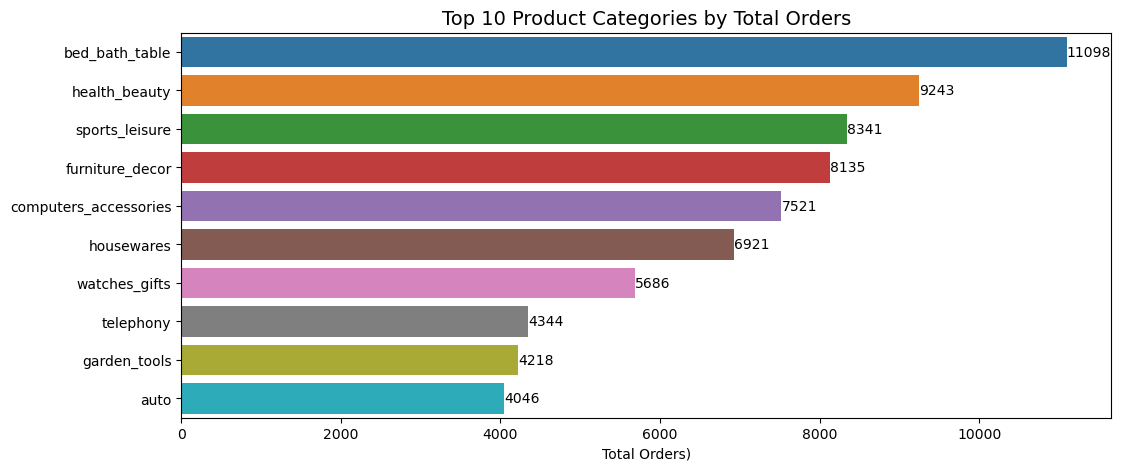

In [100]:
# visualisasi top 10 orders
plt.figure(figsize=(12,5))
ax = sns.barplot(y='product_category_name_english',
           x="order_id",
           data=top_10_order)
for i in ax.containers:
    ax.bar_label(i,)

# Title and label    
ax.set_title('Top 10 Product Categories by Total Orders', fontsize=14)
ax.set_ylabel('')
ax.set_xlabel('Total Orders)', fontsize=10)


1.1 Review Score for bed_bath_table

In [172]:
# Sebaran data review dari produk bed_bath_table
bed_bath_review = data_clean[data_clean.product_category_name_english == 'bed_bath_table']\
    .groupby(['review_score']).agg(count = ('review_score','count'))\
        .sort_values(by='review_score', ascending=True).reset_index()
bed_bath_review

,review_score,count
0,1.0,1298
1,2.0,493
2,3.0,1088
3,4.0,2166
4,5.0,6053


Text(0.5, 0, 'Review Score')

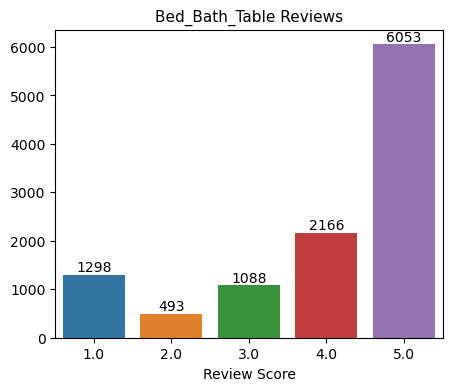

In [177]:
# Visualisasi nilai review produk bed_bath_table
plt.figure(figsize =(5,4))
ax = sns.barplot(y='count',
           x="review_score",
           data=bed_bath_review)
for i in ax.containers:
    ax.bar_label(i,)

# Title and label   
ax.set_title('Bed_Bath_Table Reviews', fontsize=11)
ax.set_ylabel('')
ax.set_xlabel('Review Score', fontsize=10)

2. Total Order Growth by Year

In [27]:
# Total orders by year
orders_years = data_clean.groupby(['year']).agg({'order_id':'count'}).sort_values(by='order_id', ascending=False).head(10)
orders_years

,order_id
year,
2018,58529
2017,48829
2016,267


Text(0.5, 0, 'Year')

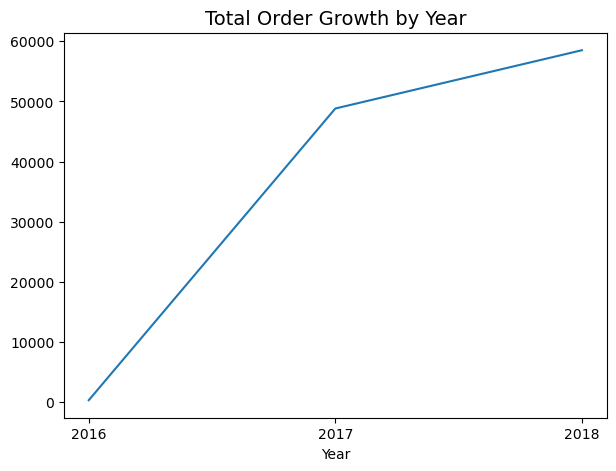

In [28]:
# Visualisasi total orders by Year
plt.figure(figsize=(7,5))
ax = sns.lineplot(x=orders_years.index,
           y="order_id",
           data=orders_years)
ax.set(xticks=np.arange(2016,2019,1))

ax.set_title('Total Order Growth by Year', fontsize=14)
ax.set_ylabel('')
ax.set_xlabel('Year', fontsize=10)


In [29]:
# Total orders by year-month
orders_months = data_clean.groupby(['year_month']).agg({'order_id':'count'}).sort_values(by='year_month', ascending=True)
orders_months.head()


,order_id
year_month,
2016-10-01,266
2016-12-01,1
2017-01-01,883
2017-02-01,1824
2017-03-01,2881


Text(0.5, 0, 'Year/Month')

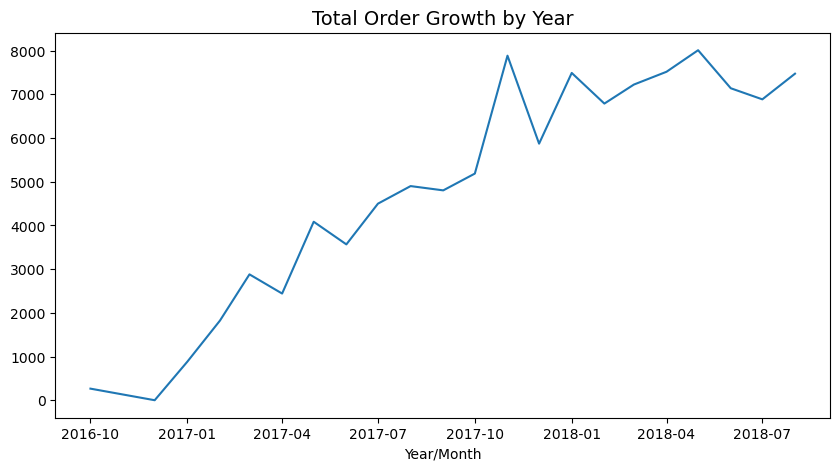

In [98]:
# Visualisasi total orders by year-month
plt.figure(figsize=(10,5))
ax = sns.lineplot(x=orders_months.index,
           y="order_id",
           data=orders_months)
ax.set(yticks=np.arange(0,9000,1000))

# Title and label
ax.set_title('Total Order Growth by Year', fontsize=14)
ax.set_ylabel('')
ax.set_xlabel('Year/Month', fontsize=10)


3. Top 5 Products Orders Growth per Year

In [31]:
# Grouping top 5 products by most orders
top_5_order = data_clean.groupby(['product_category_name_english']).agg({'order_id':'count'}).sort_values(by='order_id', ascending=False).head(5)
top_5_order = top_5_order.reset_index()
top_5_order

,product_category_name_english,order_id
0,bed_bath_table,11098
1,health_beauty,9243
2,sports_leisure,8341
3,furniture_decor,8135
4,computers_accessories,7521


In [32]:
# Convert to list 
top5_items_list = top_5_order['product_category_name_english'].tolist()
top5_items_list

['bed_bath_table',
 'health_beauty',
 'sports_leisure',
 'furniture_decor',
 'computers_accessories']

In [33]:
# Grouping current top 10 products category by order & by year for visualization
top5_order= data_clean[data_clean['product_category_name_english'].isin(top5_items_list)].groupby(['year_month','product_category_name_english']).agg({'order_id':'count'}).reset_index()
top5_order.set_index('year_month', inplace=True)
top5_order

,product_category_name_english,order_id
year_month,,
2016-10-01,bed_bath_table,7
2016-10-01,computers_accessories,14
2016-10-01,furniture_decor,64
2016-10-01,health_beauty,31
2016-10-01,sports_leisure,16
...,...,...
2018-08-01,bed_bath_table,678
2018-08-01,computers_accessories,429
2018-08-01,furniture_decor,480


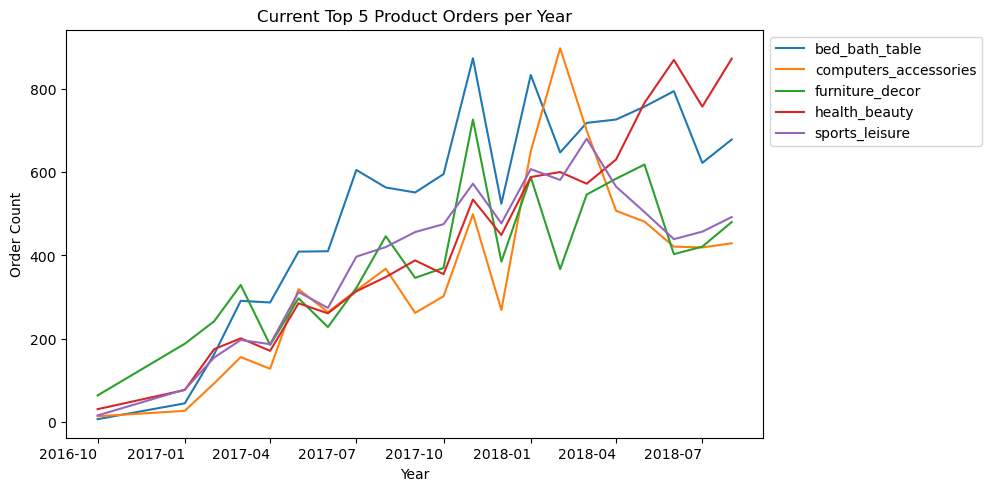

In [188]:
# Visualisasi perkembangan Top 5 Products by Orders 
plt.figure(figsize=(9,6))
top5_order.groupby('product_category_name_english')['order_id'].plot(legend=True)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.xticks(rotation = 0)

# Title and label
plt.title('Current Top 5 Product Orders per Year')
plt.xlabel("Year")
plt.ylabel("Order Count")
plt.show()

4. Top 10 Product by Revenue

In [36]:
# Total sales per category 
sales_category = data_clean.groupby(['product_category_name_english']).agg(count = ('order_id','count'), total_sales =('price','sum')).sort_values(by='total_sales', ascending=False).head(10)
sales_category

,count,total_sales
product_category_name_english,,
health_beauty,9243,1189074.58
watches_gifts,5686,1121175.66
bed_bath_table,11098,1025986.19
sports_leisure,8341,929060.34
computers_accessories,7521,870699.98
furniture_decor,8135,696747.14
housewares,6921,620106.75
cool_stuff,3721,597244.53
auto,4046,545196.09


Text(0.5, 0, 'Total Sales(in millions)')

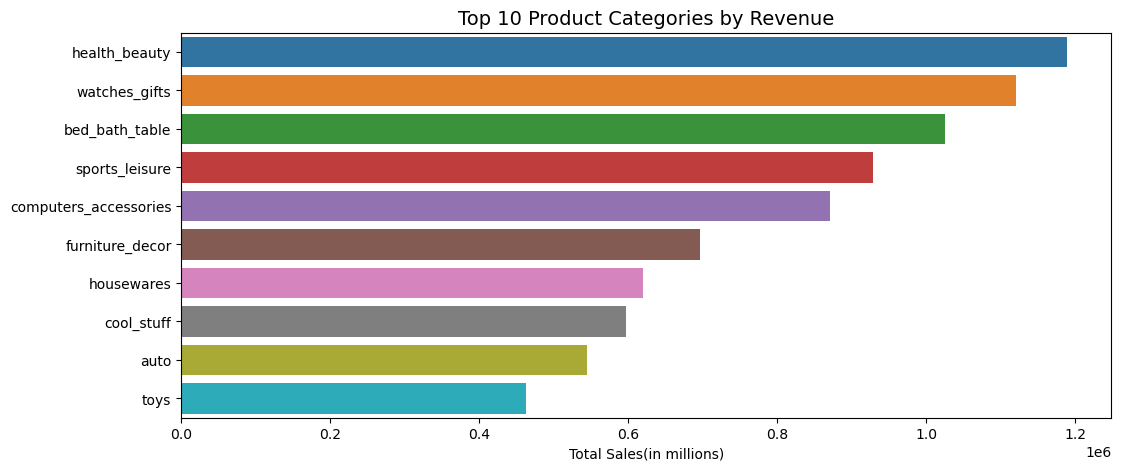

In [37]:
#visualisasi proprosi data tiap region

plt.figure(figsize=(12,5))
ax = sns.barplot(y=sales_category.index,
           x="total_sales",
           data=sales_category)

# Title and label
ax.set_title('Top 10 Product Categories by Revenue', fontsize=14)
ax.set_ylabel('')
ax.set_xlabel('Total Sales(in millions)', fontsize=10)

5. Top State with most Orders

In [185]:
# Top orders by state (from buyer)
top_order_state = data_clean.groupby(['customer_state']).agg(total_orders = ('order_id','count')).sort_values(by='total_orders', ascending=False)
top_order_state.head()

,total_orders
customer_state,
SP,47184
RJ,13169
MG,12894
RS,5889
PR,5641


In [186]:
# Top orders by state (from seller)
seller_state = data_clean.groupby(['seller_state']).agg(total_orders = ('order_id','count')).sort_values(by='total_orders', ascending=False)
seller_state.head()

,total_orders
seller_state,
SP,76646
MG,8396
PR,8303
RJ,4581
SC,3967


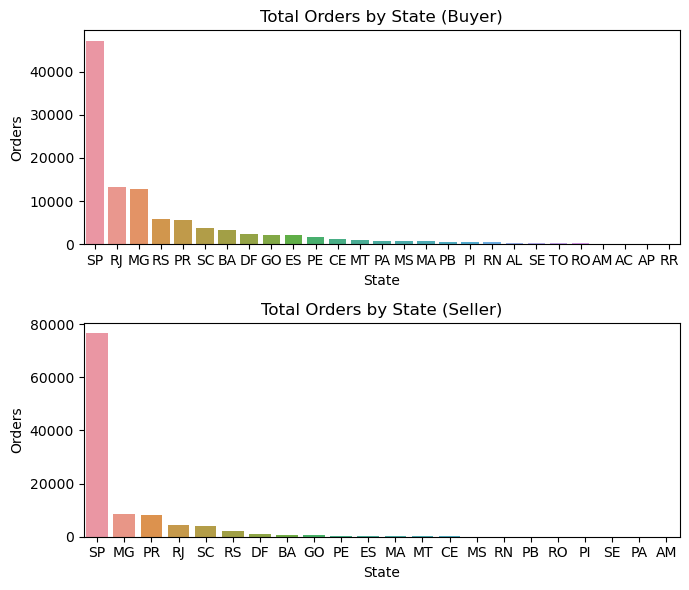

In [187]:
# Visualisasi Total orders by state
fig, ax = plt.subplots(nrows = 2, 
                       ncols = 1, 
                       figsize = (7, 6))

# Buyer
sns.barplot(y='total_orders',
           x=top_order_state.index,
           data=top_order_state,
           ax = ax[0])
           
# Title and label
ax[0].set_title('Total Orders by State (Buyer)', fontsize=12)
ax[0].set_ylabel('Orders')
ax[0].set_xlabel('State', fontsize=10)

# Seller
sns.barplot(y='total_orders',
           x=seller_state.index,
           data=seller_state,
           ax =ax[1])

# Title and label
ax[1].set_title('Total Orders by State (Seller)', fontsize=12)
ax[1].set_ylabel('Orders')
ax[1].set_xlabel('State', fontsize=10)

fig.tight_layout()

6. Review Proportions

In [79]:
# Grouping review proportions
reviews = data_clean.groupby(['review_score']).agg(review_count = ('review_score','count')).sort_values(by='review_count', ascending=False)
reviews

,review_count
review_score,
5.0,64178
4.0,21226
1.0,9924
3.0,8932
2.0,3365


Text(0, 0.5, '')

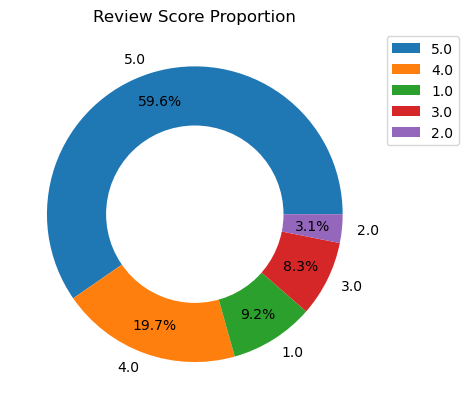

In [74]:
# Visualisasi Review Proportion
reviews.plot(kind='pie', autopct='%1.1f%%',pctdistance=0.8, subplots=True)
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Title and label
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title('Review Score Proportion')
plt.ylabel("")

7. Delivery Time 

In [135]:
# Make dur_category proper order from under 3 days to over 10 days
data_clean['dur_category'] = pd.Categorical(data_clean['dur_category'], ["under 3 days", "3-5 days", "5-7 days","7-10 days", "over 10 days"])

# Grouping delivery time category
delivery = data_clean.groupby(['dur_category']).agg(count = ('dur_category','count')).reset_index()
delivery['percentage'] = 100 * delivery['count'] / delivery['count'].sum()
delivery = delivery.round()
delivery

,dur_category,count,percentage
0,under 3 days,5378,5.0
1,3-5 days,16448,15.0
2,5-7 days,17640,16.0
3,7-10 days,21923,20.0
4,over 10 days,46236,43.0


Text(0.5, 0, 'Delivery Time')

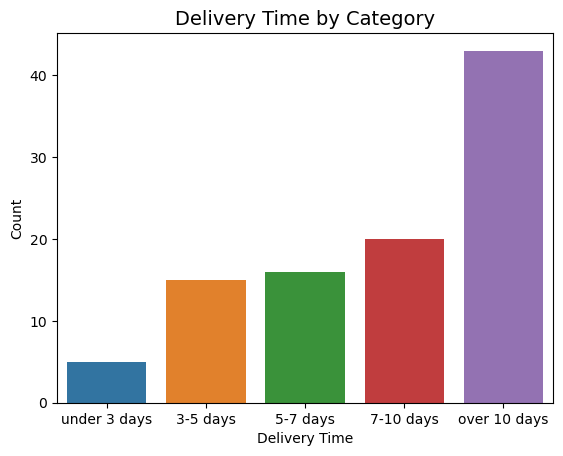

<Figure size 800x400 with 0 Axes>

In [136]:
#  Visualisasi delivery time per category
ax = sns.barplot(y='percentage',
           x='dur_category',
           data=delivery)

# Title and label
plt.figure(figsize=(8,4))
ax.set_title('Delivery Time by Category', fontsize=14)
ax.set_ylabel('Count')
ax.set_xlabel('Delivery Time', fontsize=10)

8. Ontime Delivery status

In [131]:
# Grouping on_time percentage
ontime_status = data_clean.groupby(['on_time']).agg(count = ('on_time','count'))
ontime_status['percentage'] = 100 * ontime_status['count'] / ontime_status['count'].sum()
ontime_status = ontime_status.round()
ontime_status


,count,percentage
on_time,,
Late,4357,4.0
On Time,103268,96.0


Text(0, 0.5, '')

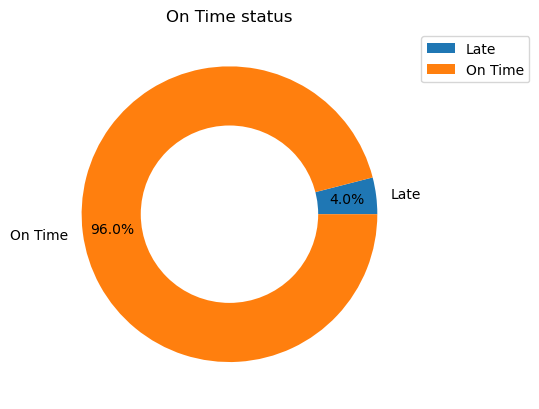

In [137]:
# Visualisasi proprosi On Time/Late delivery
ontime_status.plot(kind='pie',y='percentage', autopct='%1.1f%%',pctdistance=0.8)
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Title and label
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title('On Time status')
plt.ylabel("")